In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing

In [454]:
user_df = pd.read_csv("user.csv", encoding="cp949")
user_df.head()

,암호화된 유저아이디,가입일,마지막 접속일,최초 결제일,마지막 결제일
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,20191001,20191231,NaN,NaN
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,20191001,20191231,NaN,NaN
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,20191001,20191228,20191006.0,20191215.0
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,20191001,20191229,NaN,NaN
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,20191001,20191231,NaN,NaN


In [455]:
user_df.shape

(74454, 5)

In [456]:
columns = ["user_id", "first_access", "last_access", "first_payment", "last_payment"]
user_df.columns = columns
user_df.head()

,user_id,first_access,last_access,first_payment,last_payment
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,20191001,20191231,NaN,NaN
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,20191001,20191231,NaN,NaN
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,20191001,20191228,20191006.0,20191215.0
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,20191001,20191229,NaN,NaN
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,20191001,20191231,NaN,NaN


In [457]:
# play_df = pd.read_csv("play.csv", encoding="cp949")
# # play_df.head()

In [458]:
# play_df.shape

In [459]:
# columns = ["user_id", "highest_stage", "challenging_stage", "result", "paly_time", "is_continue", "start_time", "restuarant_id", 
#            "item_1", "item_2", "item_3", "item_4", "item_5", "item_6", "item_7", "item_8"]
# play_df.columns = columns
# play_df.head()

In [460]:
user_df.head()

,user_id,first_access,last_access,first_payment,last_payment
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,20191001,20191231,NaN,NaN
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,20191001,20191231,NaN,NaN
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,20191001,20191228,20191006.0,20191215.0
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,20191001,20191229,NaN,NaN
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,20191001,20191231,NaN,NaN


In [461]:
user_df.first_access = user_df.first_access.astype(str).apply(lambda x : datetime.datetime.strptime(x, "%Y%m%d").date())
user_df.last_access = user_df.last_access.astype(str).apply(lambda x : datetime.datetime.strptime(x, "%Y%m%d").date())

In [462]:
user_df.head()

,user_id,first_access,last_access,first_payment,last_payment
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,2019-10-01,2019-12-31,NaN,NaN
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,2019-10-01,2019-12-31,NaN,NaN
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,2019-10-01,2019-12-28,20191006.0,20191215.0
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,2019-10-01,2019-12-29,NaN,NaN
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,2019-10-01,2019-12-31,NaN,NaN


In [463]:
user_df["retention"] = (user_df.last_access - user_df.first_access).dt.days + 1
user_df.head()

,user_id,first_access,last_access,first_payment,last_payment,retention
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,2019-10-01,2019-12-31,NaN,NaN,92
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,2019-10-01,2019-12-31,NaN,NaN,92
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,2019-10-01,2019-12-28,20191006.0,20191215.0,89
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,2019-10-01,2019-12-29,NaN,NaN,90
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,2019-10-01,2019-12-31,NaN,NaN,92


In [464]:
user_df.first_payment = user_df.first_payment.fillna(0).astype(int)
user_df.last_payment = user_df.last_payment.fillna(0).astype(int)

In [465]:
type(user_df.first_access[0])

datetime.date

In [466]:
user_df.first_payment = user_df.first_payment.astype(str).apply(lambda x : datetime.datetime.strptime(x, "%Y%m%d").date() if x != '0' else 0)
user_df.last_payment = user_df.last_payment.astype(str).apply(lambda x : datetime.datetime.strptime(x, "%Y%m%d").date() if x != '0' else 0)

In [467]:
user_df.head()

,user_id,first_access,last_access,first_payment,last_payment,retention
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,2019-10-01,2019-12-31,0,0,92
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,2019-10-01,2019-12-31,0,0,92
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,2019-10-01,2019-12-28,2019-10-06,2019-12-15,89
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,2019-10-01,2019-12-29,0,0,90
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,2019-10-01,2019-12-31,0,0,92


In [468]:
user_df["has_payment"] = [1 if i != 0 else 0 for i in user_df.first_payment]
user_df.head()

,user_id,first_access,last_access,first_payment,last_payment,retention,has_payment
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,2019-10-01,2019-12-31,0,0,92,0
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,2019-10-01,2019-12-31,0,0,92,0
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,2019-10-01,2019-12-28,2019-10-06,2019-12-15,89,1
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,2019-10-01,2019-12-29,0,0,90,0
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,2019-10-01,2019-12-31,0,0,92,0


In [469]:
# user_df["pu"] = (user_df.last_payment - user_df.first_access).dt.days
# user_df.head()

In [470]:
# 마지막 결제일과 최초 결제일 간 차이를 과금율로 전제
pu = []
for i in range(len(user_df)):
    if user_df.first_payment[i] != 0 and user_df.last_payment[i] != 0:
        days = (user_df.last_payment[i] - user_df.first_payment[i]).days
        if days == 0:
            pu.append(int(1))
        else:
            pu.append(int(days+1))
    else:
        pu.append(int(0))

In [471]:
user_df["pu"] = pu
user_df.head(15)

,user_id,first_access,last_access,first_payment,last_payment,retention,has_payment,pu
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,2019-10-01,2019-12-31,0,0,92,0,0
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,2019-10-01,2019-12-31,0,0,92,0,0
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,2019-10-01,2019-12-28,2019-10-06,2019-12-15,89,1,71
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,2019-10-01,2019-12-29,0,0,90,0,0
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,2019-10-01,2019-12-31,0,0,92,0,0
5,_hu6Wu67h9l_yJ2xP6DV662xPK8naC_XJxGGzwuC6NMrYa...,2019-10-01,2019-12-28,0,0,89,0,0
6,_OOzrhNMW5T2NGSBUaxYVoSrKDfEnSvh2FQPb9Zo4ooxlc...,2019-10-01,2019-12-31,0,0,92,0,0
7,_308zxV3dORpo_wORj69N-ur-H9vH0EQoNlpGZcTOPakeU...,2019-10-01,2019-12-21,0,0,82,0,0
8,_3smqgQcENi1GxMaW_9MMJH_Q2clCZKLIbIv2clPDpDCQ5...,2019-10-01,2019-12-30,0,0,91,0,0
9,_henHYiUeJDyEhkDPZK57FlpiiFnUdTALbuVnxtdmCfrzd...,2019-10-01,2019-12-31,0,0,92,0,0


In [472]:
# 마지막 결제일과 마지막 접속일 간 차이
ret_pu = []
for i in range(len(user_df)):
    if user_df.last_payment[i] != 0 and user_df.last_access[i] != 0:
        days = (user_df.last_access[i] - user_df.last_payment[i]).days
        if days == 0:
            ret_pu.append(1)
        else:
            ret_pu.append(days+1)
    else:
        ret_pu.append(0)

In [473]:
user_df["ret_pu"] = ret_pu
user_df.head()

,user_id,first_access,last_access,first_payment,last_payment,retention,has_payment,pu,ret_pu
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,2019-10-01,2019-12-31,0,0,92,0,0,0
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,2019-10-01,2019-12-31,0,0,92,0,0,0
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,2019-10-01,2019-12-28,2019-10-06,2019-12-15,89,1,71,14
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,2019-10-01,2019-12-29,0,0,90,0,0,0
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,2019-10-01,2019-12-31,0,0,92,0,0,0


In [474]:
user_df.drop(["first_access", "last_access", "first_payment", "last_payment"], axis=1, inplace=True)

In [475]:
user_df.head()

,user_id,retention,has_payment,pu,ret_pu
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,92,0,0,0
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,92,0,0,0
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,89,1,71,14
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,90,0,0,0
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,92,0,0,0


In [476]:
user_df["pu"][i]

0

In [477]:
pu_idx = []
for i in range(len(user_df)):
    if user_df["pu"][i] != 0:
        pu_idx.append(i)

In [478]:
is_pu = pd.DataFrame(data=user_df, index=pu_idx)
is_pu.tail()

,user_id,retention,has_payment,pu,ret_pu
74416,_oIQRwD4a3yBzVJkjC5o_FH1Cx6naRBxSkY4R7AcJ3YM3g...,63,1,2,25
74417,_hUbSrPVUN1e7YneuNKAy330eskNV8LTeSecMMatxaZAJb...,51,1,1,9
74419,_w1iVU6hu4jMUmP6Nl9g28KqqY_wB2HZTvDcRB-5yMbmHP...,63,1,30,22
74438,_q-QKTfsakCjrJIB5spLYc2_JK69VC44nUDYMDonq_BlMi...,60,1,42,16
74439,_raqCpQwqdRSdjfblB-8Wru54sJ8Qs9XxkpVPdJ4VKwtNN...,62,1,46,1


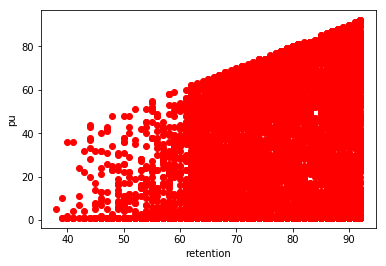

In [479]:
#retention이랑 pu 관계
plt.plot(is_pu.retention, is_pu.pu, 'ro')
plt.xlabel('retention')
plt.ylabel('pu')
plt.show()

In [480]:
play_df = pd.read_csv("play.csv", encoding="cp949")
play_df.head()
# play_df.shape

c:\users\jangy\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,암호화된 유저아이디,머물고 있는 최종스테이지,도전하는 스테이지,결과,플레이시간(초),이어하기 사용 여부,시작시간,식당 아이디,사용아이템1,사용아이템2,사용아이템3,사용아이템4,사용아이템5,사용아이템6,사용아이템7,사용아이템8
0,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,WIN,95,N,20191207 180956,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,LOSE,31,N,20191207 163158,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100097,LOSE,100,N,20191207 180616,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100092,LOSE,96,N,20191207 181746,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,LOSE,95,N,20191207 163345,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [481]:
columns = ["user_id", "highest_stage", "challenging_stage", "result", "play_time", "is_continue", "start_time", "restuarant_id", 
           "item_1", "item_2", "item_3", "item_4", "item_5", "item_6", "item_7", "item_8"]
play_df.columns = columns
play_df.head()

,user_id,highest_stage,challenging_stage,result,play_time,is_continue,start_time,restuarant_id,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8
0,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,WIN,95,N,20191207 180956,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,LOSE,31,N,20191207 163158,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100097,LOSE,100,N,20191207 180616,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100092,LOSE,96,N,20191207 181746,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,LOSE,95,N,20191207 163345,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [482]:
play_df.result = play_df.result.apply(lambda x : 1 if x.upper() == "WIN" else 0)
play_df.is_continue = play_df.is_continue.apply(lambda x : 1 if x.upper() == "Y" else 0)

In [483]:
play_df.head()

,user_id,highest_stage,challenging_stage,result,play_time,is_continue,start_time,restuarant_id,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8
0,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,1,95,0,20191207 180956,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,0,31,0,20191207 163158,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100097,0,100,0,20191207 180616,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100092,0,96,0,20191207 181746,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,0,95,0,20191207 163345,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [484]:
item_list = []
for i in range(8):
    n_item = str("item_" + str(i+1))
    play_df[n_item] = play_df[n_item].fillna(0)
    item_list += (list(play_df[n_item].unique()))
item_list = list(set(item_list))

In [485]:
item_list

[0,
 '태움 방지 코팅',
 '15초 연장+40%할인',
 '스피드 업',
 '사탕',
 '손님 5명 추가',
 '20초 연장',
 '15초 연장',
 '시간 5초 추가',
 '미션 실패 컨티뉴',
 '손님 3명 추가+40%할인',
 '손님 1명 추가',
 '코인 보너스',
 '스코어 보너스',
 '손님 3명 추가']

In [486]:
play_df.head()

,user_id,highest_stage,challenging_stage,result,play_time,is_continue,start_time,restuarant_id,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8
0,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,1,95,0,20191207 180956,10,0,0,0,0,0,0,0,0
1,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,0,31,0,20191207 163158,10,0,0,0,0,0,0,0,0
2,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100097,0,100,0,20191207 180616,10,0,0,0,0,0,0,0,0
3,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100092,0,96,0,20191207 181746,10,0,0,0,0,0,0,0,0
4,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,0,95,0,20191207 163345,10,0,0,0,0,0,0,0,0


In [487]:
# [0,'스코어 보너스','태움 방지 코팅','사탕','시간 5초 추가','20초 연장','스피드 업','손님 1명 추가','15초 연장','손님 3명 추가',
#  '손님 5명 추가', '15초 연장+40%할인','미션 실패 컨티뉴','코인 보너스','손님 3명 추가+40%할인']

In [488]:
items_col = ["score_bonus", "no_burn", "candy", "plus_5s", "speed_up", "add_guest_1", "add_guest_3", "add_guest_5"
             "extend_20s", "extend_15s", "continue", "coin_bonus", "ex_15_40", "add_3g_40"]

In [489]:
# # 1: "score_bonus" / 2:"no_burn" / 3: "candy" / 4: "plus_5s" / 5: "speed_up" / 6: "add_guest_1" / 7: "add_guest_3"
# # 8: "add_guest_5" / 9: "extend_20s" / 10: "extend_15s" / 11: "continue" / 12: "coin_bonus" / 13: "ex_15_40"/ 14: "add_3g_40"
# item_df = []
# for i in range(len(play_df)):
#     item_df.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
#     for j in range(1,9):
#         item_n = str("item_" + str(j))
#         if play_df[item_n][i] == "스코어 보너스":
#             item_df[i][0] = 1
#         if play_df[item_n][i] == "태움 방지 코팅":
#             item_df[i][1] = 1
#         if play_df[item_n][i] == "사탕":
#             item_df[i][2] = 1
#         if play_df[item_n][i] == "시간 5초 추가":
#             item_df[i][3] = 1
#         if play_df[item_n][i] == "스피드 업":
#             item_df[i][4] = 1
#         if play_df[item_n][i] == "손님 1명 추가":
#             item_df[i][5] = 1
#         if play_df[item_n][i] == "손님 3명 추가":
#             item_df[i][6] = 1
#         if play_df[item_n][i] == "손님 5명 추가":
#             item_df[i][7] = 1
#         if play_df[item_n][i] == "20초 연장":
#             item_df[i][8] = 1
#         if play_df[item_n][i] == "15초 연장":
#             item_df[i][9] = 1
#         if play_df[item_n][i] == "미션 실패 컨티뉴":
#             item_df[i][10] = 1
#         if play_df[item_n][i] == "코인 보너스":
#             item_df[i][11] = 1
#         if play_df[item_n][i] == "15초 연장+40%할인":
#             item_df[i][12] = 1
#         if play_df[item_n][i] == "손님 3명 추가+40%할인":
#             item_df[i][13] = 1

        

In [490]:
# item_df[43]
#[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 너무 sparse

In [491]:
# item_count = []
# for i in range(len(play_df)):
#     count = 0
#     for j in range(1,9):
#         item_n = str("item_" + str(j))
#         if play_df[item_n][i] != 0:
#             count += 1
#     item_count.append(count)

In [492]:
# item_count[40:50]

In [493]:
# is_item = []
# for i in item_count:
#     if i != 0:
#         is_item.append("1")
#     else:
#         is_item.append("0")

In [494]:
play_df["is_item"] = is_item

In [495]:
play_df.head()

,user_id,highest_stage,challenging_stage,result,play_time,is_continue,start_time,restuarant_id,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,is_item
0,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,1,95,0,20191207 180956,10,0,0,0,0,0,0,0,0,0
1,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,0,31,0,20191207 163158,10,0,0,0,0,0,0,0,0,0
2,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100097,0,100,0,20191207 180616,10,0,0,0,0,0,0,0,0,0
3,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100092,0,96,0,20191207 181746,10,0,0,0,0,0,0,0,0,0
4,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,0,95,0,20191207 163345,10,0,0,0,0,0,0,0,0,0


In [496]:
play_df.result.value_counts()

0    262227
1    220413
Name: result, dtype: int64

In [497]:
# user_dict = dict(play_df.user_id.value_counts())
# # 유저별 스테이지당 몇번 플레이 했는지 뽑아봐
# user_dict.keys()

In [498]:
play_df.groupby("user_id").play_time.sum()

user_id
_--AiVNG6BL8oMpmNV-II4jKUzO3rUdbh1kg47SEF1lrPrh551cBkiQ     7230
_--DccaSvGkilVeczDyX9tQIWHWptRyg29p9BT7t3GE7eBG9WsmDgcw     3369
_--UNk3-THUxMS4lIVxOgDbbc5zHq2b2tqGFQZaGsNPfkGVxnw5xHag      690
_--WaGbclgFLE-nQjfavCdA316VYwVXdOAUPx-LWrskS1dg8IC0gbCA     6848
_--aFbcWU2ybx-T1iUGMbX6Ech5pkGvJHaTo8rmzlBJJEpvOan4Nc2w      672
_--fOPjzMqEzRFTkoCQUb4jsYqps6rWAQPOZYUVuSxR6LrjLK9N-89Q     1341
_--kqCaXpdXbqIaWtf1oNfuJk0P5Qwmp-vL_LJLkCiZD-lzKhd2YWzQ     2455
_-0Np3qkWJVLfLa1Om3OJwvGXwU3hnqq2qUueVEuVzD6MEN5K3cpSMA     1086
_-0P_FHMEiyusuTajItTATHTq58W_djyH5XItpvS0nsuUAMQ1mRdVcg      240
_-0mtcLVtAbgTbv15RxC94qbbn9ruQqtRDOB1iohC-vsdabQ90Lxm1w     3616
_-0zzq1ydcSc2N0RWsYc3Uz8JD31rOrOrE0CFDSDN8wErQtdFn6PSJg      370
_-1DbQPObqVDayF8VX3chac22TUAnABduvAfvAiTFXTvD1M93hgc6iw     1207
_-1InkhSPohOfu7aQb6hjfy6ptT-lfI8k4WH7HYV9E2_fvlwsNrtF3Q     1047
_-1OMky1YgowYYL9APXICh5Vgmqn8U4DaayafhZ-ScKlRujFkeoLl5w      120
_-1axhPvTROy6xxtRFiTkjTVwQYc0vVS_uFzRi4KKQ8uWvJhf9gauew    10670
_-1mOKRpnR8kjn_O1

In [499]:
sum_play_time = pd.DataFrame(data=play_df.groupby("user_id").play_time.sum())
user_df = pd.merge(user_df, sum_play_time, left_on='user_id', right_index=True, how='left')
average_play_time = pd.DataFrame(data=play_df.groupby("user_id").play_time.mean())
user_df = pd.merge(user_df, average_play_time, left_on='user_id', right_index=True, how='left')

In [500]:
user_df.head()

,user_id,retention,has_payment,pu,ret_pu,play_time_x,play_time_y
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,92,0,0,0,NaN,NaN
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,92,0,0,0,697.0,116.166667
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,89,1,71,14,1641.0,68.375000
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,90,0,0,0,1676.0,104.750000
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,92,0,0,0,407.0,81.400000


In [501]:
user_df.rename(columns={'play_time_x': 'sum_play_time', 'play_time_y': 'avg_play_time'}, inplace=True)

In [502]:
user_df.sum_play_time.fillna(user_df.sum_play_time.mean(), inplace=True)
user_df.avg_play_time.fillna(user_df.avg_play_time.mean(), inplace=True)

In [503]:
user_df.head()

,user_id,retention,has_payment,pu,ret_pu,sum_play_time,avg_play_time
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,92,0,0,0,1832.907235,89.718965
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,92,0,0,0,697.000000,116.166667
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,89,1,71,14,1641.000000,68.375000
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,90,0,0,0,1676.000000,104.750000
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,92,0,0,0,407.000000,81.400000


In [504]:
play_df.is_item = play_df.is_item.astype(int)

In [505]:
type(play_df.is_item[0])

numpy.int32

In [506]:
avg_item = pd.DataFrame(data=play_df.groupby("user_id").is_item.mean())
sum_item = pd.DataFrame(data=play_df.groupby("user_id").is_item.sum())

In [507]:
user_df = pd.merge(user_df, avg_item, left_on='user_id', right_index=True, how='left')
user_df = pd.merge(user_df, sum_item, left_on='user_id', right_index=True, how='left')

In [508]:
play_df.corr(method="pearson")

,highest_stage,challenging_stage,result,play_time,is_continue,restuarant_id,is_item
highest_stage,1.000000,0.942734,0.044744,0.006727,0.003119,0.999999,-0.010317
challenging_stage,0.942734,1.000000,0.037091,-0.024631,-0.000742,0.942731,-0.006351
result,0.044744,0.037091,1.000000,0.003325,0.046729,0.045310,-0.032663
play_time,0.006727,-0.024631,0.003325,1.000000,0.141580,0.006013,0.164740
is_continue,0.003119,-0.000742,0.046729,0.141580,1.000000,0.003045,0.321242
restuarant_id,0.999999,0.942731,0.045310,0.006013,0.003045,1.000000,-0.010407
is_item,-0.010317,-0.006351,-0.032663,0.164740,0.321242,-0.010407,1.000000


In [509]:
play_df.is_continue = play_df.is_continue.astype(int)

In [510]:
avg_continue = pd.DataFrame(data=play_df.groupby("user_id").is_continue.mean())
sum_continue = pd.DataFrame(data=play_df.groupby("user_id").is_continue.sum())

In [511]:
user_df = pd.merge(user_df, avg_continue, left_on='user_id', right_index=True, how='left')
user_df = pd.merge(user_df, sum_continue, left_on='user_id', right_index=True, how='left')

In [512]:
user_df.head()

,user_id,retention,has_payment,pu,ret_pu,sum_play_time,avg_play_time,is_item_x,is_item_y,is_continue_x,is_continue_y
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,92,0,0,0,1832.907235,89.718965,NaN,NaN,NaN,NaN
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,92,0,0,0,697.000000,116.166667,0.166667,1.0,0.166667,1.0
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,89,1,71,14,1641.000000,68.375000,0.041667,1.0,0.041667,1.0
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,90,0,0,0,1676.000000,104.750000,0.250000,4.0,0.000000,0.0
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,92,0,0,0,407.000000,81.400000,0.000000,0.0,0.000000,0.0


In [513]:
user_df.rename(columns={'is_item_x': 'avg_item', 'is_item_y': 'sum_item', 
                        'is_continue_x': 'avg_continue', 'is_continue_y': 'sum_continue'}, inplace=True)

In [514]:
user_df.avg_item.fillna(user_df.avg_item.mean(), inplace=True)
user_df.sum_item.fillna(user_df.sum_item.mean(), inplace=True)
user_df.avg_continue.fillna(user_df.avg_continue.mean(), inplace=True)
user_df.sum_continue.fillna(user_df.sum_continue.mean(), inplace=True)
sum(user_df.avg_continue.isnull())

0

In [515]:
user_df.head()

,user_id,retention,has_payment,pu,ret_pu,sum_play_time,avg_play_time,avg_item,sum_item,avg_continue,sum_continue
0,__4et3Bgl5Cxiykg5teoHOqxgXGfuAt8Dt7_SlYudeCH7v...,92,0,0,0,1832.907235,89.718965,0.112412,2.139625,0.011112,0.243097
1,_xx9UYMbzRv6agHGJsts58SvSfYb1n2KkAWHaMFlFB9iVX...,92,0,0,0,697.000000,116.166667,0.166667,1.000000,0.166667,1.000000
2,_UU1bJQzRpINiuKbklq3iUwnmV0j7tDrbTnVlf-pHqnGcO...,89,1,71,14,1641.000000,68.375000,0.041667,1.000000,0.041667,1.000000
3,_n20rkJ5HkW6DJbSBDVUjQbA0L0BpqjtIupqaDqIGQjBmF...,90,0,0,0,1676.000000,104.750000,0.250000,4.000000,0.000000,0.000000
4,_8g_mZfFYL-wZT9ocI2q5ZyqQuf--hh-V_Y62DYLaCq07W...,92,0,0,0,407.000000,81.400000,0.000000,0.000000,0.000000,0.000000


In [516]:
user_df.corr(method="pearson")

,retention,has_payment,pu,ret_pu,sum_play_time,avg_play_time,avg_item,sum_item,avg_continue,sum_continue
retention,1.000000,0.101100,0.127219,0.082324,-0.014618,0.015506,0.018117,0.006187,-0.009967,-0.015137
has_payment,0.101100,1.000000,0.707229,0.744316,0.068542,-0.002588,0.043838,0.089477,0.040375,0.080127
pu,0.127219,0.707229,1.000000,0.213099,0.085989,-0.004920,0.052746,0.118376,0.055146,0.113490
ret_pu,0.082324,0.744316,0.213099,1.000000,0.003091,0.000718,0.017078,0.015543,0.007211,0.007180
sum_play_time,-0.014618,0.068542,0.085989,0.003091,1.000000,0.008597,-0.050705,0.504755,0.035190,0.354759
avg_play_time,0.015506,-0.002588,-0.004920,0.000718,0.008597,1.000000,0.101804,-0.002408,0.144003,0.083691
avg_item,0.018117,0.043838,0.052746,0.017078,-0.050705,0.101804,1.000000,0.528420,0.259983,0.156046
sum_item,0.006187,0.089477,0.118376,0.015543,0.504755,-0.002408,0.528420,1.000000,0.162161,0.430102
avg_continue,-0.009967,0.040375,0.055146,0.007211,0.035190,0.144003,0.259983,0.162161,1.000000,0.577871
sum_continue,-0.015137,0.080127,0.113490,0.007180,0.354759,0.083691,0.156046,0.430102,0.577871,1.000000


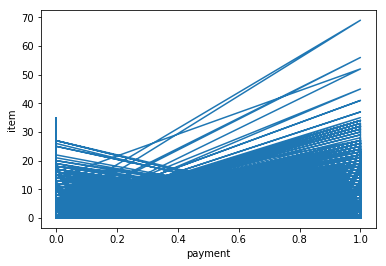

In [518]:
#retention이랑 pu 관계
plt.plot(user_df.has_payment, user_df.sum_item)
plt.xlabel('payment')
plt.ylabel('item')
plt.show()

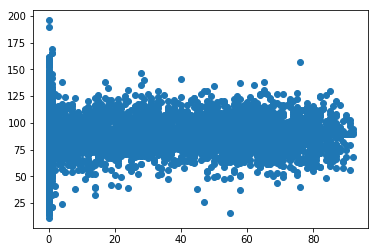

In [529]:
plt.scatter(user_df.pu, user_df.avg_play_time)
plt.show()

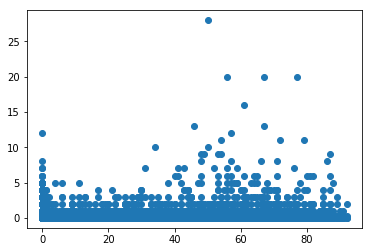

In [532]:
plt.scatter(user_df.pu, user_df.sum_continue)
plt.show()

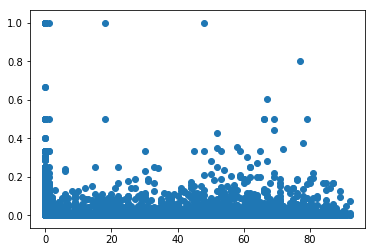

In [533]:
plt.scatter(user_df.pu, user_df.avg_continue)
plt.show()

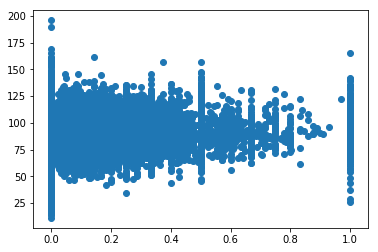

In [534]:
plt.scatter(user_df.avg_item, user_df.avg_play_time)
plt.show()

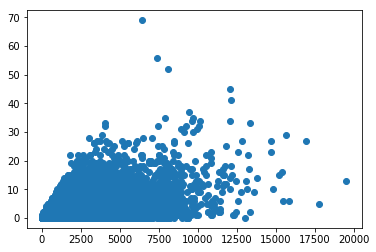

In [535]:
plt.scatter(user_df.sum_play_time, user_df.sum_item)
plt.show()

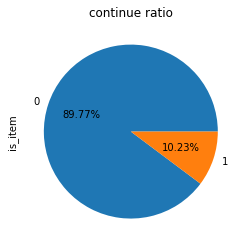

In [545]:
item_df = play_df.is_item.value_counts()
item_df.plot.pie(autopct='%.2f%%')
plt.title("continue ratio")
plt.show()

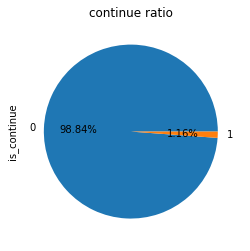

In [546]:
continue_df = play_df.is_continue.value_counts()
continue_df.plot.pie(autopct='%.2f%%')
plt.title("continue ratio")
plt.show()

In [537]:
win_idx = []
for i in range(len(play_df)):
    if play_df["result"][i] != 0:
        win_idx.append(i)

In [538]:
win_df = pd.DataFrame(data=play_df, index=win_idx)
win_df.head()

,user_id,highest_stage,challenging_stage,result,play_time,is_continue,start_time,restuarant_id,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,is_item
0,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,1,95,0,20191207 180956,10,0,0,0,0,0,0,0,0,0
28,_1cYsqxDLTPfV5dlTnGVepoPSx_dr16zn6rCW7w9VuCMBp...,90118,90117,1,100,0,20191207 110903,9,0,0,0,0,0,0,0,0,0
38,_2MACevDddQARjVyazD_LyG3IHu_evSqPFfjCc2r6AfyLY...,40085,40085,1,122,0,20191207 214456,4,0,0,0,0,0,0,0,0,0
41,_5MeDYYj0ADt3vUe7hfxOsVZ_1BwB2C2blUZk60ad18ssj...,40088,40088,1,85,0,20191207 010251,4,0,0,0,0,0,0,0,0,0
44,_5MeDYYj0ADt3vUe7hfxOsVZ_1BwB2C2blUZk60ad18ssj...,40088,40080,1,110,0,20191207 233448,4,0,0,0,0,0,0,0,0,0


In [539]:
lose_df = pd.DataFrame(data=play_df.drop(index=win_idx))
lose_df.head()

,user_id,highest_stage,challenging_stage,result,play_time,is_continue,start_time,restuarant_id,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,is_item
1,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,0,31,0,20191207 163158,10,0,0,0,0,0,0,0,0,0
2,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100097,0,100,0,20191207 180616,10,0,0,0,0,0,0,0,0,0
3,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100092,0,96,0,20191207 181746,10,0,0,0,0,0,0,0,0,0
4,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100090,0,95,0,20191207 163345,10,0,0,0,0,0,0,0,0,0
5,_-yTB_vWYNK3eld8eI_-0PJyBijXwtewbqpLwhUUIuwtvf...,100095,100092,0,112,0,20191207 181345,10,0,0,0,0,0,0,0,0,0


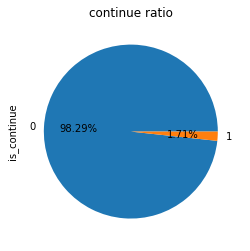

In [541]:
# win_df.is_continue.value_counts()
win_df.is_continue.value_counts().plot.pie(autopct='%.2f%%')
plt.title("continue ratio")
plt.show()

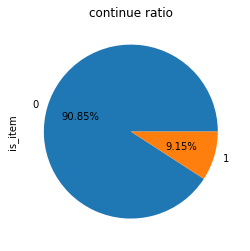

In [547]:
# win_df.is_continue.value_counts()
win_df.is_item.value_counts().plot.pie(autopct='%.2f%%')
plt.title("continue ratio")
plt.show()

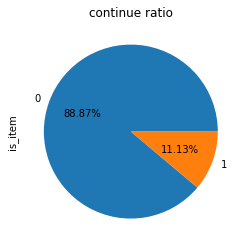

In [548]:
lose_df.is_item.value_counts().plot.pie(autopct='%.2f%%')
plt.title("continue ratio")
plt.show()

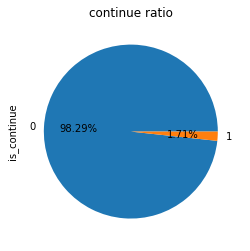

In [557]:
# win_df.is_continue.value_counts()
win_df.is_continue.value_counts().plot.pie(autopct='%.2f%%')
plt.title("continue ratio")
plt.show()

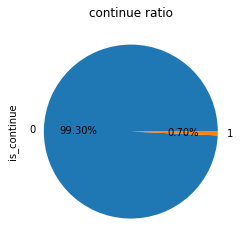

In [558]:
# win_df.is_continue.value_counts()
lose_df.is_continue.value_counts().plot.pie(autopct='%.2f%%')
plt.title("continue ratio")
plt.show()

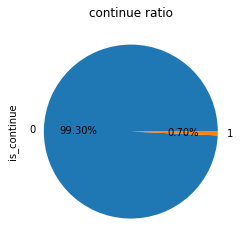

In [542]:
lose_df.is_continue.value_counts().plot.pie(autopct='%.2f%%')
plt.title("continue ratio")
plt.show()

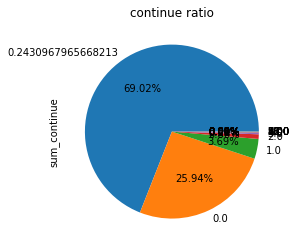

In [555]:
user_df.sum_continue.value_counts().plot.pie(autopct='%.2f%%')
plt.title("continue ratio")
plt.show()

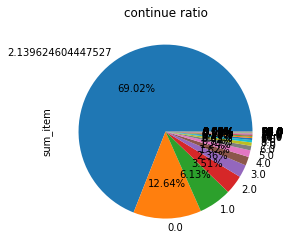

In [556]:
user_df.sum_item.value_counts().plot.pie(autopct='%.2f%%')
plt.title("continue ratio")
plt.show()